In [55]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
dfy = pd.read_csv('GPU_logYOLO.txt')
dft = pd.read_csv('GPU_logYOLO-tiny.txt')

In [3]:
# figure( figsize= (8,4))
dates = list(df['Date'][::40])
plot(df['Date'],dfy['GPU Chip Power Draw [W]'],'b',label='YOLOv3 608')
plot(dft['GPU Chip Power Draw [W]'],'r',label='YOLOv3 tiny')
xticks(arange(0,len(df['Date']),40),arange(0,len(df['Date']),40) ,rotation=45)
# grid()
ylabel('$p_i [W]$')
xlabel('$t [s]$')
title('GPU power consumption')
legend()

NameError: name 'df' is not defined

In [4]:
def w2kwh(df):
    d = df['GPU Chip Power Draw [W]']
    w=d.sum()/len(d)
    kwh = w/1e3
    return kwh

w2kwh(dfy), w2kwh(dft)

(0.01351986301369863, 0.007358333333333334)

In [6]:
def w2kwy(df):
    d = df['GPU Chip Power Draw [W]']
    w=d.sum()/len(d)
    kwy = w/1e3*(24*365)
    return kwy
w2kwy(dft)

64.459

\begin{equation}
kWh = \frac{W*t}{1000}\\
W = \frac{1}{1000*3600}=kWh
\end{equation}

In [8]:
from PIL import Image

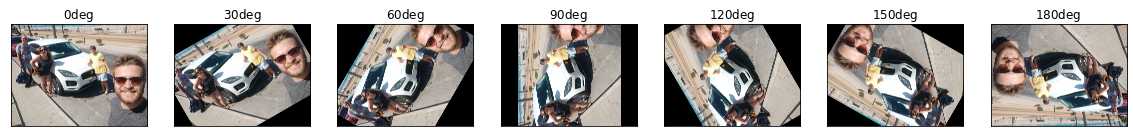

In [20]:
img = Image.open('augmentation/IMG_20190702_165555.jpg')

angles = arange(0,181,30)
figure(figsize(20,20))

for i, angle in enumerate(angles):
    subplot(1,len(angles),i+1)
    rot = img.rotate(angle)
    imshow(rot)
    rot.save(f'augmentation/rotated/img{angle}.jpg')
    xticks([]), yticks([])
    title(f'{angle}$\deg$')


In [17]:
imgs = os.listdir('augmentation/rotated/')
imgs = [x for x in imgs if x.startswith('box')]
for i,v in enumerate(imgs):
    subplot(2,len(imgs),i+1)
    img = Image.open(f'augmentation/rotated/{v}')
    imshow(img)
    xticks([]), yticks([])
    angle = v.split('_')[1].split('.')[0][3:]
    title(f'{angle}$\deg$')

In [16]:
img = cv2.imread('augmentation/IMG_20190702_165555.jpg')


angles = arange(0,181,30)
figure(figsize(20,20))

for i, angle in enumerate(angles):
    subplot(1,len(angles),i+1)
    imshow(loc)
    # loc.save(f'augmentation/rotated/img{angle}.jpg')
    xticks([]), yticks([])
    title(f'{angle}$\deg$')


array(['box_img0.jpg', 'box_img120.jpg', 'box_img150.jpg',
       'box_img180.jpg', 'box_img30.jpg', 'box_img60.jpg',
       'box_img90.jpg'], dtype='<U14')

In [56]:
import cv2
import skimage
img = cv2.imread('augmentation/IMG_20190702_165555.jpg')
# img = cv2.resize(img, (608,608))
for i in linspace(0,0.1,10):
    nimg = skimage.util.random_noise(img,mode='gaussian',var=i)*255
    fname = 'extra'
    cv2.imwrite(f'augmentation/noise/{int(i*100)}.jpg',nimg.astype(uint8))

0.0